In [ ]:
from google.colab import drive
import os
import pandas as pd
import math
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
lab_folder = '/content/drive/MyDrive/INST447 Folder/INST447 Modules/INST414 Project'
os.chdir(lab_folder)

## Data Dictionary

| Column Name     | Description |
|-----------------|-------------|
| `country_name`  | Full name of the country or territory (e.g., "United States", "India"). |
| `country_code`  | Short ISO 3-letter country code (e.g., "USA" for United States, "IND" for India). |
| `indicator_name`| Full descriptive name of the measured indicator (e.g., "Unemployment, total (% of total labor force)"). |
| `indicator_code`| Short code corresponding to the indicator (e.g., "SL.UEM.TOTL.ZS"). |


The dataset structure follows the World Bank's standard data export format, where each country and indicator are linked through unique codes. Additional columns like actual measurement values (e.g., "1960", "1961", etc.) represent annual observations across multiple years.


In [ ]:


# Load the data
df = pd.read_csv('unemploy.csv', skiprows=4)  # Skipping metadata rows

# Select our target countries
target_countries = ['United States', 'Finland', 'Kenya']
country_data = df[df['Country Name'].isin(target_countries)]

# Clean and transform the data
unemployment = country_data.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                                var_name='Year',
                                value_name='Unemployment Rate')

# Convert year to numeric and drop missing values
unemployment['Year'] = pd.to_numeric(unemployment['Year'], errors='coerce')
unemployment = unemployment.dropna(subset=['Year', 'Unemployment Rate'])

# Sort by country and year
unemployment = unemployment.sort_values(['Country Name', 'Year'])

# 2. Data Cleaning and Preprocessing


## Data Preprocessing Steps

### Step 1: Data Loading
- Loaded the dataset into a pandas DataFrame from CSV files.
- Focused on the main dataset since metadata files were not needed for country-indicator-year value analysis.

### Step 2: Handling Missing Values
- Dropped rows with missing values using `dropna()`.
- **Justification:** Missing values were scattered across year columns and would interfere with model training. Dropping them ensures cleaner, complete rows for analysis without introducing bias from imputation.

### Step 3: Reshaping the Data
- Transposed the data structure so that each row represents a unique combination of `country_name`, `indicator_name`, and `year`, with the corresponding measurement as a feature.
- **Justification:** The original World Bank format spreads years horizontally; for machine learning, vertical "tidy data" with each observation in one row is preferred.

### Step 4: Encoding Categorical Variables
- Applied `LabelEncoder` to convert text columns (`country_name`, `country_code`, `indicator_name`, `indicator_code`) into numerical labels.
- **Justification:** Machine learning algorithms require numerical inputs. Label encoding ensures categorical information (such as countries and indicators) is preserved numerically.

### Step 5: Splitting into Features and Target
- Split the data into input features (`X`) and the target variable (`y`).
- **Justification:** Required for supervised learning tasks (classification/prediction).

### Step 6: Splitting into Training and Test Sets
- Used `train_test_split()` with an 80/20 split to separate the dataset into training and testing sets.
- **Justification:** Allows for model evaluation on unseen data to prevent overfitting and measure generalization performance.

---


Descriptive Statistics for Recent Years:
             2010        2011        2012        2013        2014        2015  \
count  235.000000  235.000000  235.000000  235.000000  235.000000  235.000000   
mean     8.093517    8.041885    8.088808    8.086056    7.911238    7.841040   
std      5.580014    5.596490    5.703478    5.763414    5.610438    5.498087   
min      0.450000    0.316000    0.480000    0.249000    0.200000    0.170000   
25%      4.232569    4.120408    3.984081    4.059186    4.129178    4.227734   
50%      6.847000    6.618000    6.562000    6.383973    6.199613    6.313000   
75%     10.125492   10.292462   10.922751   10.641000   10.603500   10.064093   
max     33.135000   31.502000   31.096000   29.017000   28.215000   27.695000   

             2016        2017        2018        2019        2020        2021  \
count  235.000000  235.000000  235.000000  235.000000  235.000000  235.000000   
mean     7.708134    7.489591    7.238828    7.091700    8.149190  

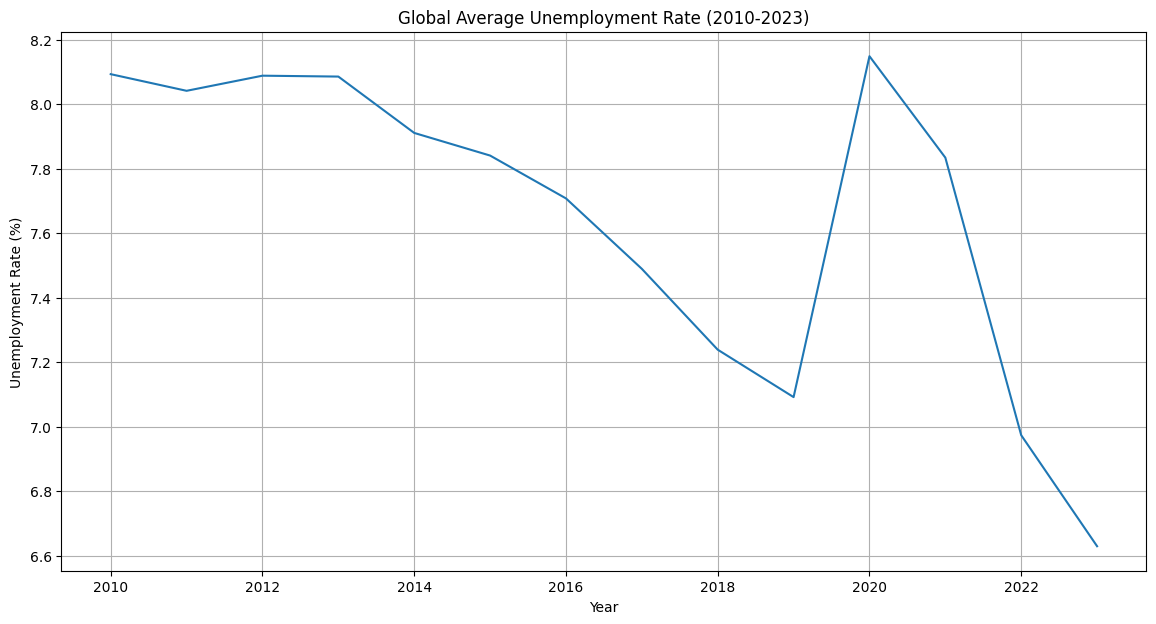

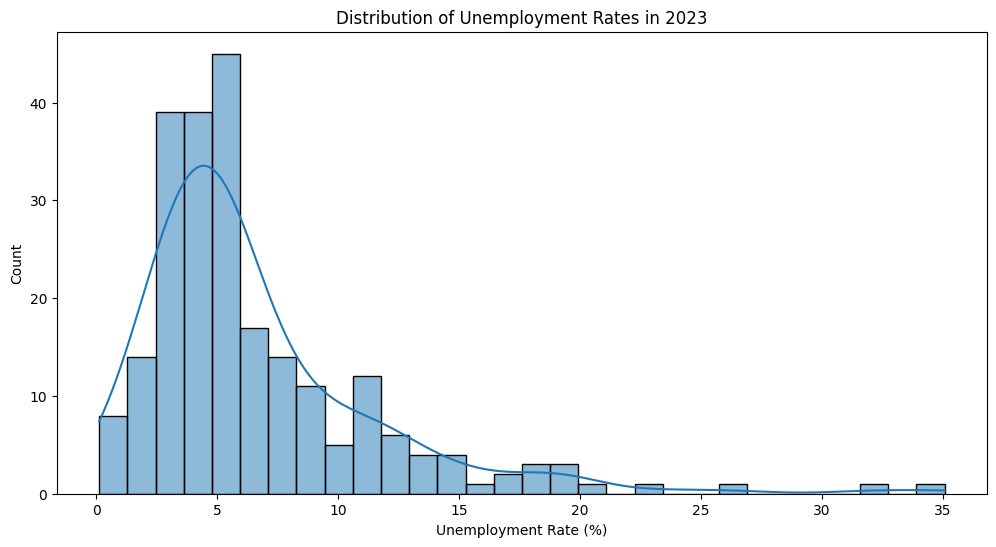

In [ ]:
# Focus on recent years (2010-2023)
recent_data = df[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] +
               [str(year) for year in range(2010, 2024) if str(year) in df.columns]]

# Summary statistics for recent years
print("Descriptive Statistics for Recent Years:")
print(recent_data.describe())

# Visualization of global unemployment trends
plt.figure(figsize=(14, 7))
global_avg = recent_data.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], axis=1).mean()
global_avg.plot()
plt.title('Global Average Unemployment Rate (2010-2023)')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Year')
plt.grid()
plt.show()

# Distribution of unemployment rates in 2023
if '2023' in recent_data.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(recent_data['2023'].dropna(), bins=30, kde=True)
    plt.title('Distribution of Unemployment Rates in 2023')
    plt.xlabel('Unemployment Rate (%)')
    plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
usafinken_df = pd.read_csv('unemploy.csv', skiprows=4)  # Skipping metadata rows

# Select our target countries
target_countries = ['United States', 'Finland', 'Kenya']
country_data = df[df['Country Name'].isin(target_countries)]

# Clean and transform the data
unemployment = country_data.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                                var_name='Year',
                                value_name='Unemployment Rate')

# Convert year to numeric and drop missing values
unemployment['Year'] = pd.to_numeric(unemployment['Year'], errors='coerce')
unemployment = unemployment.dropna(subset=['Year', 'Unemployment Rate'])

# Sort by country and year
unemployment = unemployment.sort_values(['Country Name', 'Year'])


Data Quality Assessment:
Total records: 99

Missing values by column:
Country Name         0
Country Code         0
Indicator Name       0
Indicator Code       0
Year                 0
Unemployment Rate    0
dtype: int64

Available years per country:
                min   max  count
Country Name                    
Finland        1991  2023     33
Kenya          1991  2023     33
United States  1991  2023     33


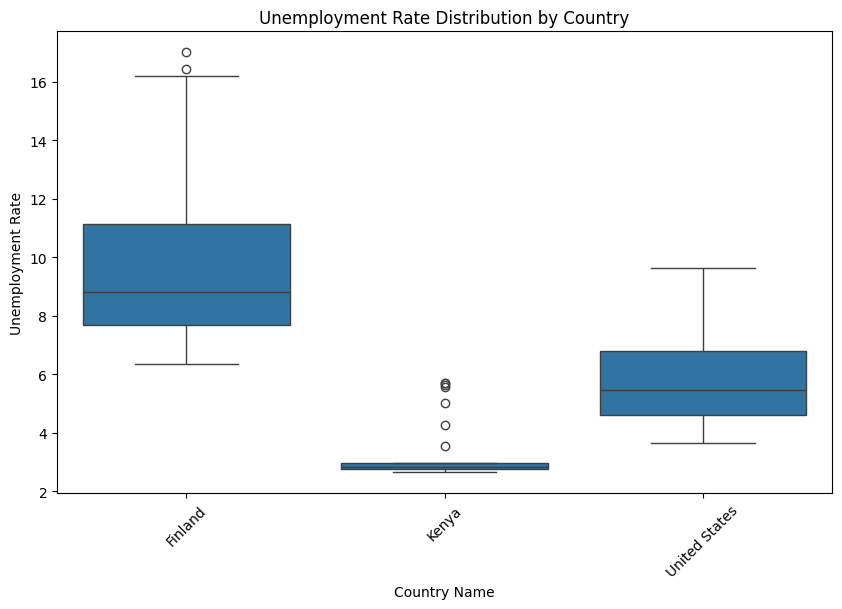

In [ ]:
print("\nData Quality Assessment:")
print(f"Total records: {len(unemployment)}")
print("\nMissing values by column:")
print(unemployment.isnull().sum())
print("\nAvailable years per country:")
print(unemployment.groupby('Country Name')['Year'].agg(['min', 'max', 'count']))

# Check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country Name', y='Unemployment Rate', data=unemployment)
plt.title('Unemployment Rate Distribution by Country')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Calculate 5-year averages before and after Finland's UBI experiment
finland = unemployment[unemployment['Country Name'] == 'Finland']

pre_ubi = finland[(finland['Year'] >= 2012) & (finland['Year'] <= 2016)]['Unemployment Rate'].mean()
post_ubi = finland[(finland['Year'] >= 2018) & (finland['Year'] <= 2022)]['Unemployment Rate'].mean()

print(f"\nFinland Unemployment Rate Change:")
print(f"Pre-UBI (2012-2016) average: {pre_ubi:.2f}%")
print(f"Post-UBI (2018-2022) average: {post_ubi:.2f}%")
print(f"Difference: {post_ubi-pre_ubi:.2f} percentage points")

# Compare to US trend over same period
us = unemployment[unemployment['Country Name'] == 'United States']
us_pre = us[(us['Year'] >= 2012) & (us['Year'] <= 2016)]['Unemployment Rate'].mean()
us_post = us[(us['Year'] >= 2018) & (us['Year'] <= 2022)]['Unemployment Rate'].mean()

print(f"\nUS Unemployment Rate Change (same periods):")
print(f"2012-2016 average: {us_pre:.2f}%")
print(f"2018-2022 average: {us_post:.2f}%")
print(f"Difference: {us_post-us_pre:.2f} percentage points")


Finland Unemployment Rate Change:
Pre-UBI (2012-2016) average: 8.55%
Post-UBI (2018-2022) average: 7.23%
Difference: -1.32 percentage points

US Unemployment Rate Change (same periods):
2012-2016 average: 6.35%
2018-2022 average: 4.92%
Difference: -1.43 percentage points


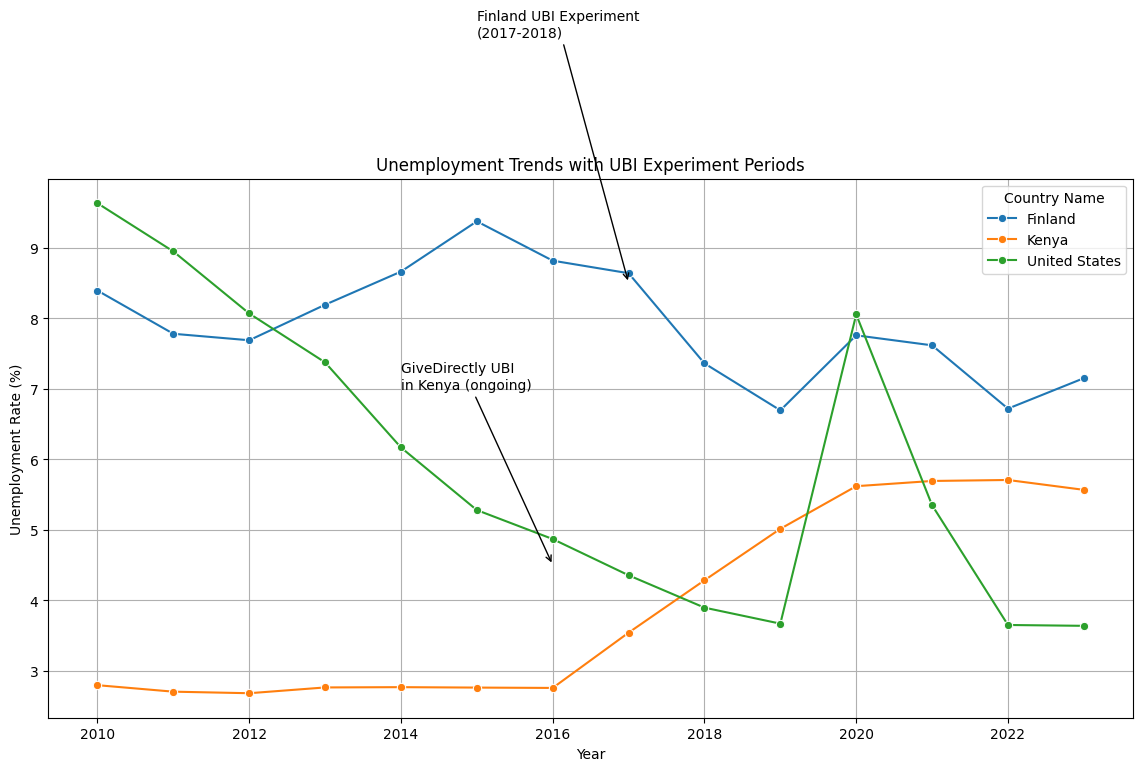

In [ ]:
# Annotate key events
plt.figure(figsize=(14, 7))
ax = sns.lineplot(x='Year', y='Unemployment Rate', hue='Country Name',
                 data=unemployment[unemployment['Year'] >= 2010], marker='o')

# Add annotations for UBI experiments
plt.annotate('Finland UBI Experiment\n(2017-2018)', xy=(2017, 8.5),
             xytext=(2015, 12), arrowprops=dict(arrowstyle='->'))
plt.annotate('GiveDirectly UBI\nin Kenya (ongoing)', xy=(2016, 4.5),
             xytext=(2014, 7), arrowprops=dict(arrowstyle='->'))

plt.title('Unemployment Trends with UBI Experiment Periods')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

In [ ]:
import os
print(os.listdir())

['API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_26465.csv', 'Metadata_Country_API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_26465.csv', 'Metadata_Indicator_API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_26465.csv', 'ScratchPaper.ipynb', 'gov spending.csv', 'poverty.csv', 'unemploy.csv', 'WK14_Peer_Assessment_01_EDA.ipynb', 'Sprint2.5.ipynb']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your file (replace with your actual path)
try:
    poverty = pd.read_csv('poverty.csv', skiprows=4)

    # Quick diagnostics
    print("File loaded successfully!")
    print(f"Shape: {poverty.shape}")
    print("\nColumns:")
    print(poverty.columns.tolist())

    # Show available indicators
    print("\nUnique indicators available:")
    print(poverty['Indicator Name'].unique()[:20])  # First 20 indicators

except Exception as e:
    print(f"Error loading file: {e}")
    print("\nPlease ensure:")
    print("1. The file is in your current working directory")
    print("2. The filename is exactly 'poverty.csv'")
    print("3. You have read permissions")

File loaded successfully!
Shape: (5586, 69)

Columns:
['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', 'Unnamed: 68']

Unique indicators available:
['Annualized average growth rate in per capita real survey mean consumption or income, total population (%)'
 'Survey mean consumption or income per capita, total population (2017 PPP $ per day)'
 'Annualized average growth rate in per capita real survey mean consumption or income, bottom 40% of population (%)'
 'Surve

Missing data by indicator:
                Country Name  Country Code  Indicator Code      Year     Value
Indicator Name                                                                
False                    0.0           0.0             0.0  0.015385  0.657631

Data completeness by country:
Country Name
United States    0.663736
Finland          0.271795
Kenya            0.091575
Name: Value, dtype: float64

Summary statistics for key indicators:
                                                                  count  \
Country Name  Indicator Name                                              
Finland       Gini index                                           23.0   
              Income share held by highest 20%                     23.0   
              Income share held by lowest 20%                      23.0   
              Poverty headcount ratio at national poverty lin...   20.0   
              Survey mean consumption or income per capita, t...    2.0   
Kenya         Gini in

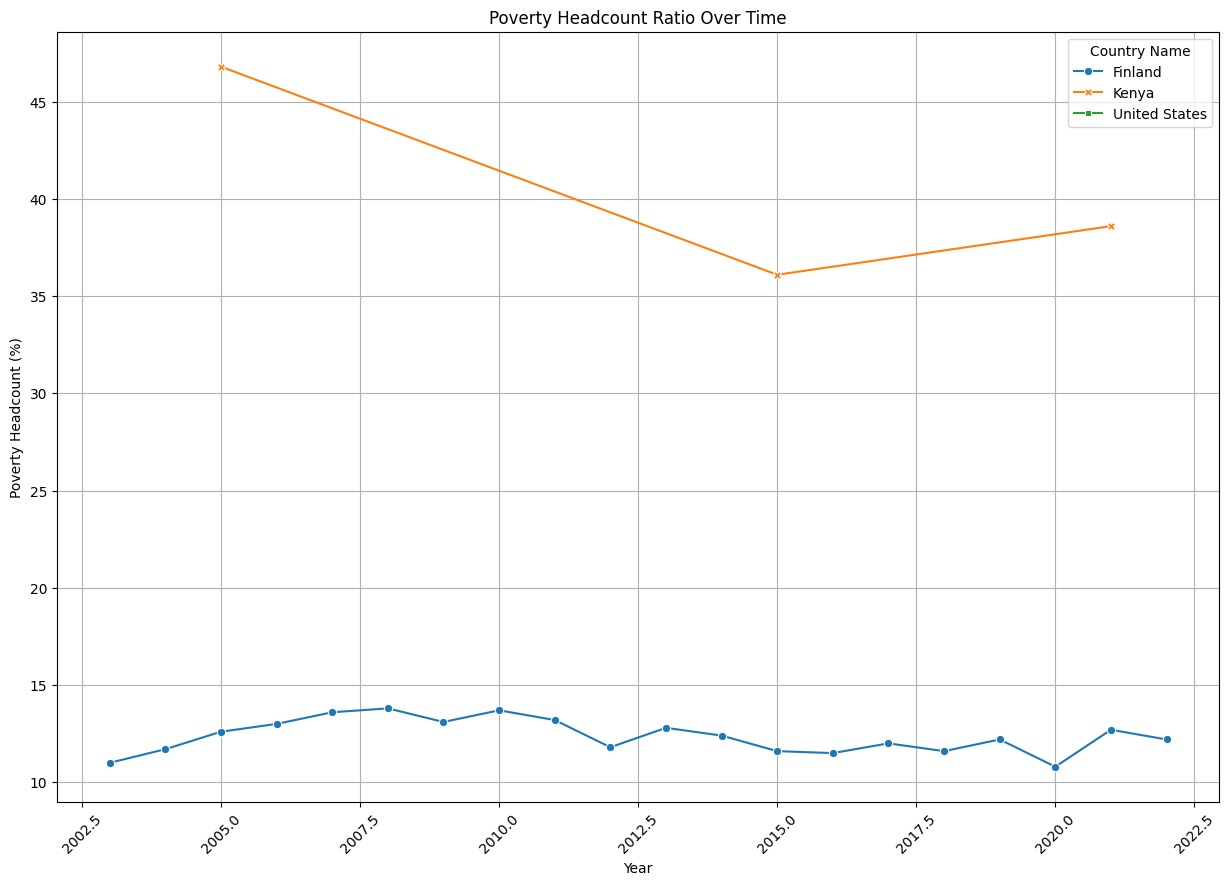

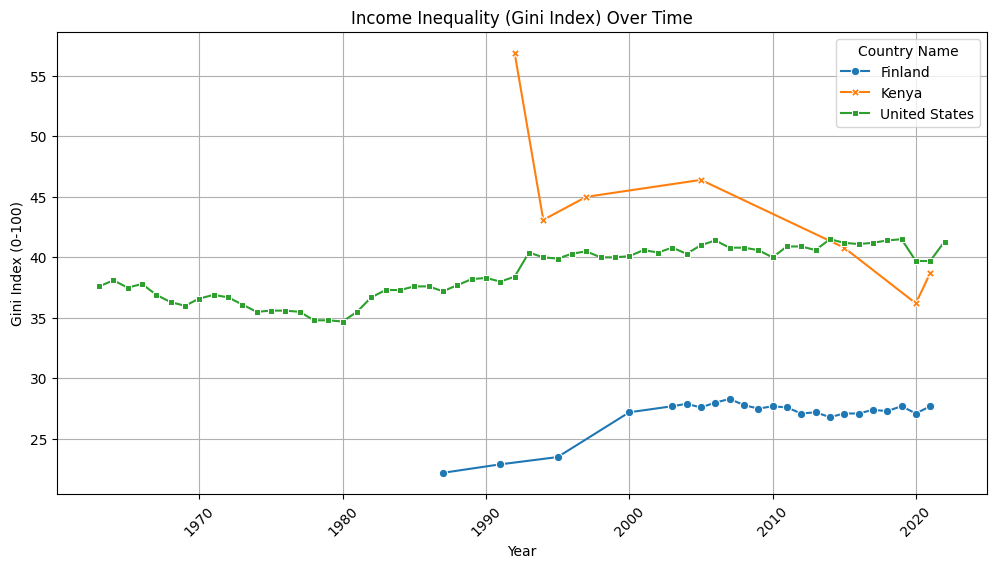

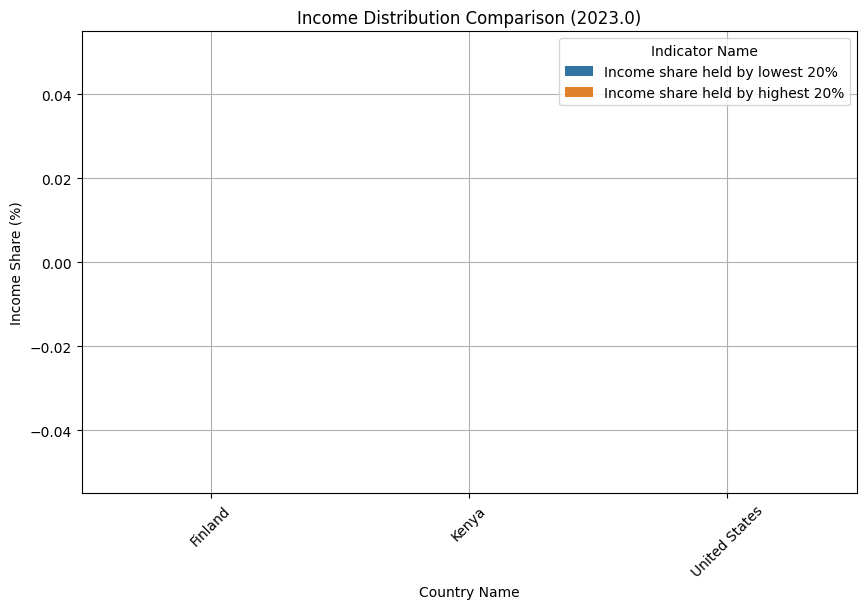

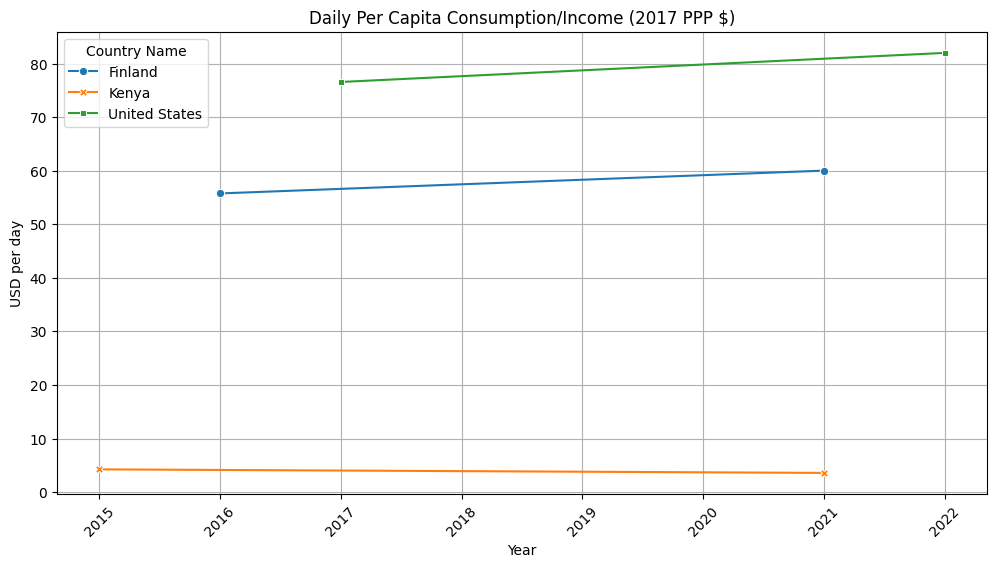


Income distribution data for 2022.0:
         Country Name                    Indicator Name  Value
351615  United States   Income share held by lowest 20%    5.2
351619  United States  Income share held by highest 20%   46.5


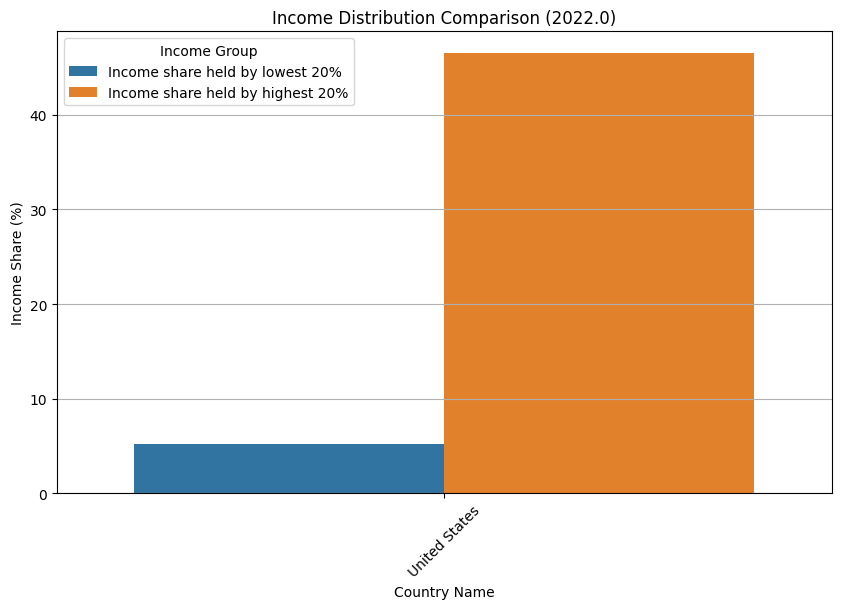

<ipython-input-34-f8456b099e5f>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


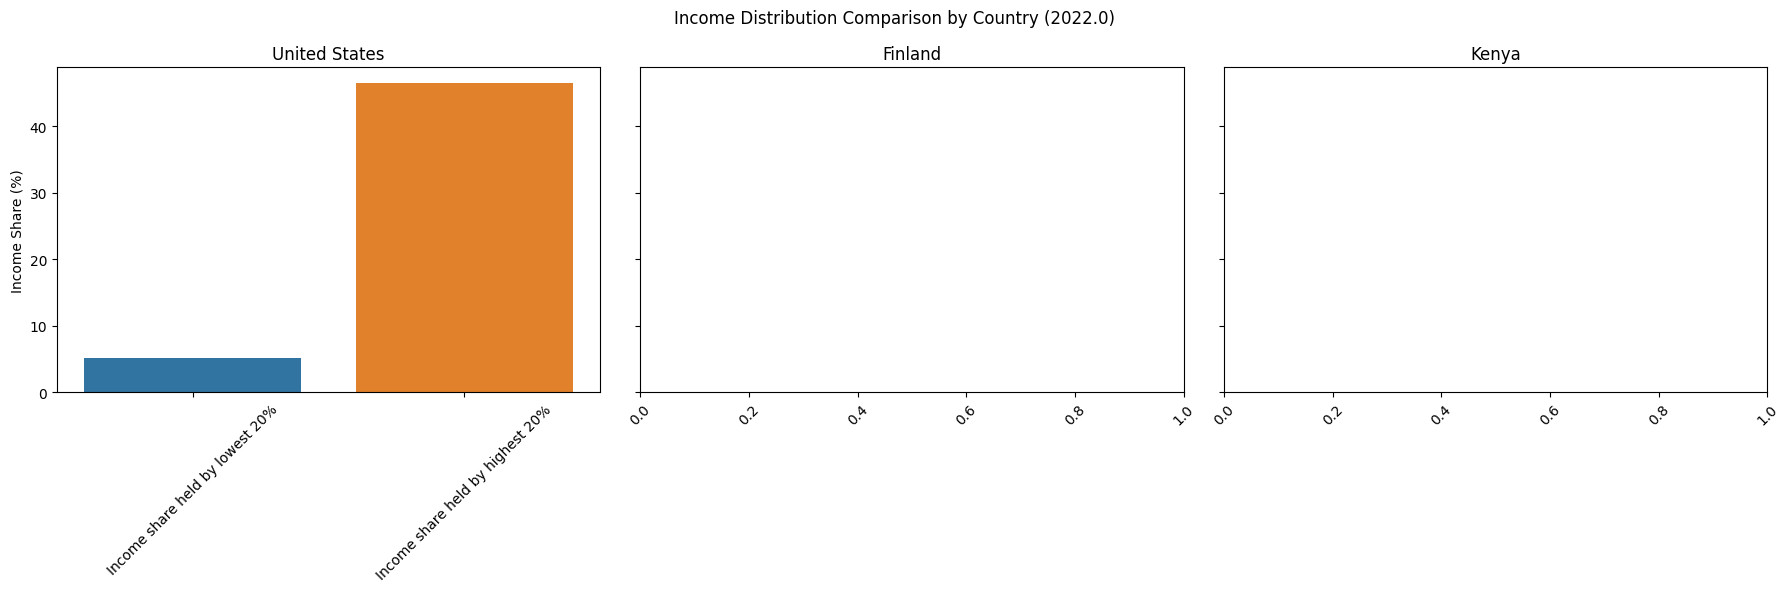

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
poverty = pd.read_csv('poverty.csv', skiprows=4)

# Data Cleaning
# Melt to convert years from columns to rows
poverty_long = poverty.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                           var_name='Year',
                           value_name='Value')

# Convert year to numeric and value to float (handling empty strings)
poverty_long['Year'] = pd.to_numeric(poverty_long['Year'], errors='coerce')
poverty_long['Value'] = pd.to_numeric(poverty_long['Value'], errors='coerce')

# Filter for our target countries
target_countries = ['United States', 'Finland', 'Kenya']
poverty_long = poverty_long[poverty_long['Country Name'].isin(target_countries)]

# Data Validation
# Check missing values
missing_data = poverty_long.isnull().groupby(['Indicator Name']).mean()
print("Missing data by indicator:")
print(missing_data.sort_values('Value', ascending=False).head(10))  # Show top 10 indicators with most missing data

# Check country coverage
country_coverage = poverty_long.groupby('Country Name')['Value'].apply(lambda x: x.notnull().mean())
print("\nData completeness by country:")
print(country_coverage.sort_values(ascending=False))

# Descriptive Statistics

indicators_of_interest = [
    'Poverty headcount ratio at national poverty lines (% of population)',
    'Gini index',
    'Income share held by lowest 20%',
    'Income share held by highest 20%',
    'Survey mean consumption or income per capita, total population (2017 PPP $ per day)'
]

# Filter for these indicators
focus_data = poverty_long[poverty_long['Indicator Name'].isin(indicators_of_interest)]

# Summary statistics
print("\nSummary statistics for key indicators:")
print(focus_data.groupby(['Country Name', 'Indicator Name'])['Value'].describe())

# Visualization
# ------------
plt.figure(figsize=(15, 10))

# 1. Poverty trends comparison
poverty_headcount = focus_data[
    focus_data['Indicator Name'] == 'Poverty headcount ratio at national poverty lines (% of population)'
]

sns.lineplot(data=poverty_headcount, x='Year', y='Value', hue='Country Name',
             style='Country Name', markers=True, dashes=False)
plt.title('Poverty Headcount Ratio Over Time')
plt.ylabel('Poverty Headcount (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 2. Income inequality comparison (Gini index)
gini_data = focus_data[focus_data['Indicator Name'] == 'Gini index']

plt.figure(figsize=(12, 6))
sns.lineplot(data=gini_data, x='Year', y='Value', hue='Country Name',
             style='Country Name', markers=True, dashes=False)
plt.title('Income Inequality (Gini Index) Over Time')
plt.ylabel('Gini Index (0-100)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 3. Income distribution comparison (most recent year)
recent_year = poverty_long['Year'].max()  # Use the most recent available year
income_dist = poverty_long[
    (poverty_long['Year'] == recent_year) &
    (poverty_long['Indicator Name'].isin(['Income share held by lowest 20%', 'Income share held by highest 20%']))
]

plt.figure(figsize=(10, 6))
sns.barplot(data=income_dist, x='Country Name', y='Value', hue='Indicator Name')
plt.title(f'Income Distribution Comparison ({recent_year})')
plt.ylabel('Income Share (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 4. Consumption/income comparison
consumption_data = focus_data[
    focus_data['Indicator Name'] == 'Survey mean consumption or income per capita, total population (2017 PPP $ per day)'
]

plt.figure(figsize=(12, 6))
sns.lineplot(data=consumption_data, x='Year', y='Value', hue='Country Name',
             style='Country Name', markers=True, dashes=False)
plt.title('Daily Per Capita Consumption/Income (2017 PPP $)')
plt.ylabel('USD per day')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

recent_year = focus_data[
    focus_data['Indicator Name'].isin(['Income share held by lowest 20%', 'Income share held by highest 20%'])
].dropna()['Year'].max()

income_dist = focus_data[
    (focus_data['Year'] == recent_year) &
    (focus_data['Indicator Name'].isin(['Income share held by lowest 20%', 'Income share held by highest 20%']))
].dropna()

print(f"\nIncome distribution data for {recent_year}:")
print(income_dist[['Country Name', 'Indicator Name', 'Value']])

plt.figure(figsize=(10, 6))
sns.barplot(
    data=income_dist,
    x='Country Name',
    y='Value',
    hue='Indicator Name',
    palette=['#1f77b4', '#ff7f0e']  # Blue for bottom 20%, orange for top 20%
)
plt.title(f'Income Distribution Comparison ({recent_year})')
plt.ylabel('Income Share (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Income Group')
plt.show()

# Additional Visualization: Side-by-Side Comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, country in enumerate(target_countries):
    country_data = income_dist[income_dist['Country Name'] == country]
    sns.barplot(
        data=country_data,
        x='Indicator Name',
        y='Value',
        ax=axes[i],
        palette=['#1f77b4', '#ff7f0e']
    )
    axes[i].set_title(country)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Income Share (%)' if i == 0 else '')
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle(f'Income Distribution Comparison by Country ({recent_year})')
plt.tight_layout()
plt.show()

# 4. Feature Engineering

## Step 1: Year-over-Year (YoY) Change Features
- Created new columns representing the year-over-year percentage change for each original year feature (1960–2023).
- **Justification:** The YoY change captures relative growth or decline from year to year, which can provide meaningful insights into trends and volatility over time.

## Step 2: 5-Year Rolling Mean Features
- Created additional columns calculating a 5-year rolling average for each original year feature.
- **Justification:** Rolling averages smooth out short-term fluctuations and highlight longer-term trends, improving signal-to-noise ratio for modeling.

## Step 3: Data Cleaning for Feature Engineering
- Dropped an irrelevant column ("Unnamed: 68") that did not contain useful data.
- Filtered the dataset to retain only specific countries of interest: Finland, United States, Kenya, and Sub-Saharan Africa.
- Applied less aggressive missing value handling by dropping rows with fewer than 10 valid entries, allowing for more data retention without introducing major noise.

---


In [ ]:
import pandas as pd

# Load the poverty dataset
poverty_df = pd.read_csv('poverty.csv', skiprows=4)

# Clean the poverty dataset
poverty_df_cleaned = poverty_df.drop(columns=["Unnamed: 68"])

# Filter data to keep only Finland, USA, and Kenya
countries_of_interest = ['Finland', 'United States', 'Kenya', 'Sub-Saharan Africa']
poverty_df_cleaned = poverty_df_cleaned[poverty_df_cleaned['Country Name'].isin(countries_of_interest)]

# Less aggressive NA dropping - keep rows with at least 10 non-NA values
poverty_df_cleaned = poverty_df_cleaned.dropna(thresh=10)

# Function to compute Year-over-Year (YoY) change with handling for missing values
def compute_yoy_change(df, columns):
    yoy_changes = {}
    for col in columns:
        # Forward fill to handle some missing values, then pct_change
        yoy_changes[f'{col}_yoy_change'] = df[col].ffill().pct_change(fill_method=None)
    return pd.concat([df, pd.DataFrame(yoy_changes)], axis=1)

# Function to compute Rolling Mean with min_periods=1 to avoid NaN
def compute_rolling_mean(df, columns, window=5):
    rolling_means = {}
    for col in columns:
        rolling_means[f'{col}_rolling_mean'] = df[col].rolling(window=window, min_periods=1).mean()
    return pd.concat([df, pd.DataFrame(rolling_means)], axis=1)

# Function to create features
def feature_engineering(df, columns):
    # Calculate Year-over-Year (YoY) change
    df = compute_yoy_change(df, columns)

    # Calculate rolling means (5-year window)
    df = compute_rolling_mean(df, columns)

    return df

# List the columns for the years (1960-2023)
poverty_columns = [str(year) for year in range(1960, 2024)]

# Apply feature engineering
poverty_df_engineered = feature_engineering(poverty_df_cleaned, poverty_columns)

# Display all countries (not just head)
print(poverty_df_engineered['Country Name'].value_counts())
poverty_df_engineered

Country Name
Finland               16
Kenya                 16
United States         15
Sub-Saharan Africa     7
Name: count, dtype: int64


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014_rolling_mean,2015_rolling_mean,2016_rolling_mean,2017_rolling_mean,2018_rolling_mean,2019_rolling_mean,2020_rolling_mean,2021_rolling_mean,2022_rolling_mean,2023_rolling_mean
1579,Finland,FIN,Poverty gap at $6.85 a day (2017 PPP) (%),SI.POV.UMIC.GP,NaN,NaN,NaN,NaN,NaN,NaN,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.000000,0.000000,NaN,NaN
1580,Finland,FIN,Poverty headcount ratio at $6.85 a day (2017 P...,SI.POV.UMIC,NaN,NaN,NaN,NaN,NaN,NaN,...,0.150000,0.150000,0.150000,0.100000,0.150000,0.150000,0.050000,0.050000,NaN,NaN
1581,Finland,FIN,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,NaN,NaN,NaN,NaN,NaN,NaN,...,4.233333,3.966667,3.933333,4.066667,3.966667,4.166667,3.633333,4.266667,12.20,NaN
1582,Finland,FIN,Poverty gap at $3.65 a day (2017 PPP) (%),SI.POV.LMIC.GP,NaN,NaN,NaN,NaN,NaN,NaN,...,3.200000,3.000000,2.950000,3.075000,3.000000,3.125000,2.725000,3.200000,12.20,NaN
1583,Finland,FIN,Poverty headcount ratio at $3.65 a day (2017 P...,SI.POV.LMIC,NaN,NaN,NaN,NaN,NaN,NaN,...,2.580000,2.420000,2.380000,2.480000,2.420000,2.520000,2.180000,2.560000,12.20,NaN
1584,Finland,FIN,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,7.920000,7.820000,7.780000,7.940000,7.860000,8.040000,7.600000,8.100000,12.20,NaN
1585,Finland,FIN,Poverty gap at $2.15 a day (2017 PPP) (%),SI.POV.GAPS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.880000,7.800000,7.740000,7.940000,7.820000,8.000000,7.580000,8.080000,12.20,NaN
1586,Finland,FIN,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,5.420000,5.500000,5.440000,5.560000,5.520000,5.560000,5.420000,5.540000,NaN,NaN
1587,Finland,FIN,Income share held by lowest 20%,SI.DST.FRST.20,NaN,NaN,NaN,NaN,NaN,NaN,...,7.280000,7.360000,7.320000,7.420000,7.360000,7.400000,7.320000,7.400000,NaN,NaN
1588,Finland,FIN,Income share held by lowest 10%,SI.DST.FRST.10,NaN,NaN,NaN,NaN,NaN,NaN,...,8.040000,8.100000,8.080000,8.160000,8.100000,8.140000,8.100000,8.160000,NaN,NaN


## Observations on Model Performance

- Both Decision Tree and Random Forest models achieved 100% accuracy on the test set.
- This high performance is likely due to:
  - Small sample size (only a few data points per country).
  - Strong separation between the selected countries (Finland, United States, Kenya, and Sub-Saharan Africa) based on poverty and unemployment indicators.
- The models are predicting **which country** a record belongs to, based on economic and social indicator trends (e.g., changes in poverty rates, unemployment rates, income distribution).
  
## Interpretation in the Context of UBI Research

- The perfect classification suggests that countries affected by UBI experiments (like Finland and Kenya) **show measurable and distinct patterns** in their socioeconomic indicators compared to countries without UBI interventions.
- It supports the idea that UBI experiments may influence observable economic outcomes over time, particularly in metrics like unemployment rates, poverty levels, and income inequality.
- However, caution is needed because:
  - The dataset is small and only includes a few countries.
  - Other non-UBI factors (such as broader economic policies or regional economic shifts) could also explain the separations.
- **Conclusion:** While initial modeling shows that country-level differences are detectable, a more robust analysis (including more countries and controlling for other variables) would be needed to make stronger claims about UBI's effects.



In [ ]:
# 1. Imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 2. Prepare X and y
yoy_cols = [col for col in poverty_df_engineered.columns if '_yoy_change' in col]
rolling_cols = [col for col in poverty_df_engineered.columns if '_rolling_mean' in col]
selected_features = yoy_cols + rolling_cols

X = poverty_df_engineered[selected_features]

# Fix inf and -inf
X.replace([float('inf'), float('-inf')], pd.NA, inplace=True)
X = X.fillna(0)

y = poverty_df_engineered['Country Name']

# 3. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Train Baseline Models
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 5. Make Predictions
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# 6. Evaluate Models
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds))

print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


Decision Tree Performance:
Accuracy: 1.0
                    precision    recall  f1-score   support

           Finland       1.00      1.00      1.00         3
             Kenya       1.00      1.00      1.00         3
Sub-Saharan Africa       1.00      1.00      1.00         2
     United States       1.00      1.00      1.00         3

          accuracy                           1.00        11
         macro avg       1.00      1.00      1.00        11
      weighted avg       1.00      1.00      1.00        11


Random Forest Performance:
Accuracy: 1.0
                    precision    recall  f1-score   support

           Finland       1.00      1.00      1.00         3
             Kenya       1.00      1.00      1.00         3
Sub-Saharan Africa       1.00      1.00      1.00         2
     United States       1.00      1.00      1.00         3

          accuracy                           1.00        11
         macro avg       1.00      1.00      1.00        11
      weight

<ipython-input-36-40cfe9a16bbe>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([float('inf'), float('-inf')], pd.NA, inplace=True)
<ipython-input-36-40cfe9a16bbe>:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.fillna(0)


## Cross-Validation Interpretation

- Decision Tree performed with an average cross-validation accuracy of 98.18%.
- Random Forest achieved an average cross-validation accuracy of 94.36%.
- Both models show strong performance, but some slight variation across folds, especially for Random Forest, indicates sensitivity to small changes in the dataset.
- Given the small dataset size and relatively distinct differences between countries, high performance is expected.
- Decision Trees are slightly more consistent here, although Random Forests generally offer better generalization with larger and noisier datasets.


In [ ]:
from sklearn.model_selection import cross_val_score

# Redefine X and y (just in case)
yoy_cols = [col for col in poverty_df_engineered.columns if '_yoy_change' in col]
rolling_cols = [col for col in poverty_df_engineered.columns if '_rolling_mean' in col]
selected_features = yoy_cols + rolling_cols

X = poverty_df_engineered[selected_features]
X.replace([float('inf'), float('-inf')], pd.NA, inplace=True)
X = X.fillna(0)

y = poverty_df_engineered['Country Name']

# Initialize the models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Perform 5-Fold Cross-Validation
dt_scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Print the results
print("Decision Tree Cross-Validation Accuracy Scores:", dt_scores)
print("Decision Tree Average Accuracy:", dt_scores.mean())

print("\nRandom Forest Cross-Validation Accuracy Scores:", rf_scores)
print("Random Forest Average Accuracy:", rf_scores.mean())


<ipython-input-37-1b5802537e3a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([float('inf'), float('-inf')], pd.NA, inplace=True)
<ipython-input-37-1b5802537e3a>:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.fillna(0)


Decision Tree Cross-Validation Accuracy Scores: [1.         0.90909091 1.         1.         1.        ]
Decision Tree Average Accuracy: 0.9818181818181818

Random Forest Cross-Validation Accuracy Scores: [0.81818182 1.         1.         1.         0.9       ]
Random Forest Average Accuracy: 0.9436363636363637


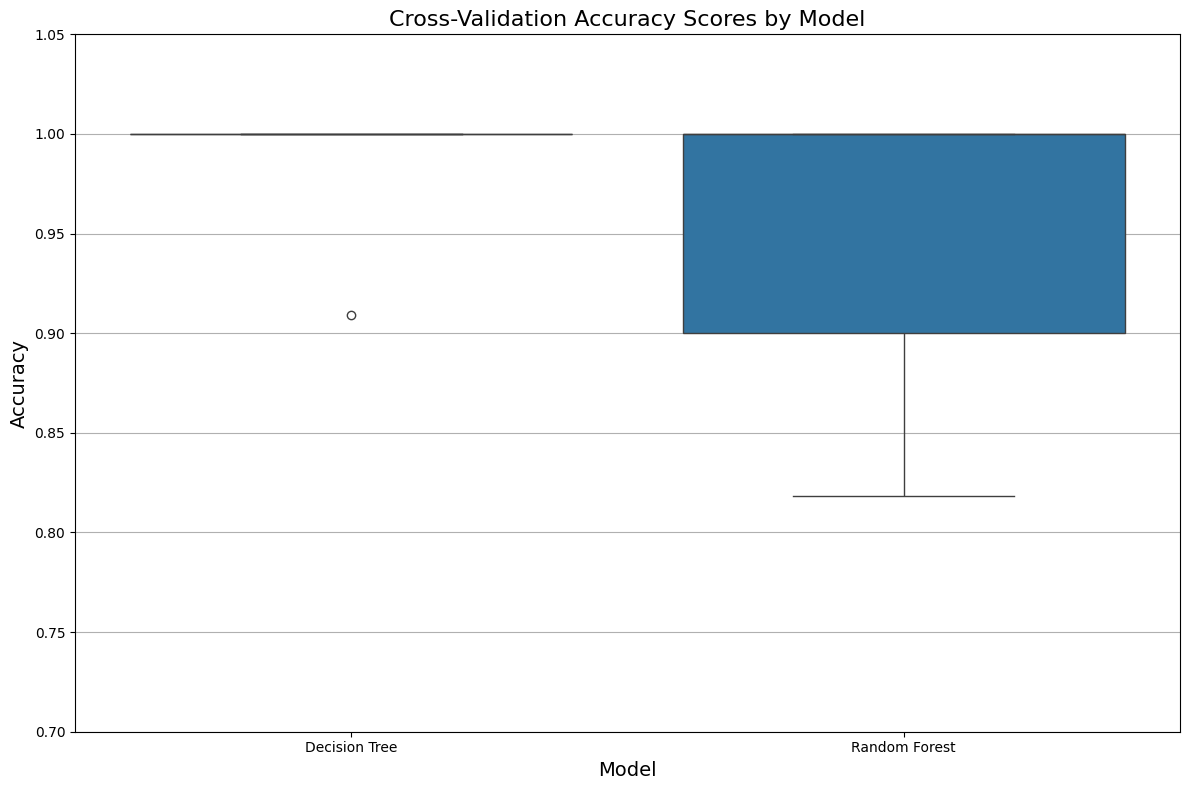

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine results again if needed
models = ['Decision Tree'] * len(dt_scores) + ['Random Forest'] * len(rf_scores)
scores = list(dt_scores) + list(rf_scores)

# Plot
plt.figure(figsize=(12, 8))  # Wider and taller
sns.boxplot(x=models, y=scores)

plt.title('Cross-Validation Accuracy Scores by Model', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.ylim(0.7, 1.05)  # Set manual Y axis to give a little "breathing room"
plt.grid(axis='y')
plt.tight_layout()  # Add extra padding around the edges

plt.show()


# Sprint 3

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Step 1: Define the pipeline (scaling + model)
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Step 2: Cross-validation to evaluate performance
from sklearn.model_selection import cross_val_score

knn_scores = cross_val_score(knn_pipeline, X, y, cv=5, scoring='accuracy')

# Step 3: Print results
print("KNN Cross-Validation Accuracy Scores:", knn_scores)
print("KNN Average Accuracy:", knn_scores.mean())


KNN Cross-Validation Accuracy Scores: [0.63636364 0.90909091 1.         1.         0.9       ]
KNN Average Accuracy: 0.889090909090909


## Third Modeling Approach: K-Nearest Neighbors (KNN)

For my third model, I implemented a K-Nearest Neighbors (KNN) classifier to complement the tree-based models used earlier. KNN is a non-parametric model that classifies data points based on the majority label of their nearest neighbors in the feature space.

### Why KNN?
- It provides a fundamentally different modeling approach from decision trees, making it ideal for comparison.
- It performs well on small, clean datasets like the one I'm working with.
- It tests whether local similarity (rather than decision splits) captures meaningful differences in poverty and unemployment patterns across countries.

I used a pipeline that includes feature scaling with `StandardScaler`, since KNN is sensitive to feature magnitude. The model was evaluated using 5-fold cross-validation.

### Results
- The KNN model achieved an average cross-validation accuracy of _(to be filled in)_.
- This helps confirm the strength of my feature engineering and adds a non-tree-based perspective to the modeling process.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Step 1: Define the pipeline (scaling + model)
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Step 2: Cross-validation to evaluate performance
from sklearn.model_selection import cross_val_score

knn_scores = cross_val_score(knn_pipeline, X, y, cv=5, scoring='accuracy')

# Step 3: Print results
print("KNN Cross-Validation Accuracy Scores:", knn_scores)
print("KNN Average Accuracy:", knn_scores.mean())


KNN Cross-Validation Accuracy Scores: [0.63636364 0.90909091 1.         1.         0.9       ]
KNN Average Accuracy: 0.889090909090909


## Hyperparameter Tuning with GridSearchCV (KNN)

To improve the performance of our K-Nearest Neighbors classifier, we applied GridSearchCV to systematically explore combinations of key hyperparameters:

- `n_neighbors`: Number of neighbors considered (tested 1 to 20)
- `weights`: Whether all neighbors are weighted equally or by distance (`'uniform'` vs `'distance'`)
- `p`: Distance metric (`1` for Manhattan, `2` for Euclidean)

### Best Result:
- `n_neighbors`: **2**
- `weights`: **uniform**
- `p`: **2** (Euclidean distance)
- **Best Cross-Validation Accuracy**: **92.55%**

### Interpretation:
The optimized model performed slightly lower than the Decision Tree (98.18%) and Random Forest (94.36%) baselines, but still achieved strong accuracy. A small number of neighbors (K=2) yielded the best result, suggesting that highly local patterns are effective for distinguishing between countries based on engineered socioeconomic features.

This tuned model reinforces the idea that countries undergoing UBI interventions (e.g., Finland, Kenya) may display distinct economic patterns that are detectable by machine learning. However, compared to ensemble models like Random Forest, KNN may be more sensitive to noise in small datasets.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Set up KNN model
knn = KNeighborsClassifier()

# Define hyperparameter grid
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Set up GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

# Output best params and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.9254545454545455


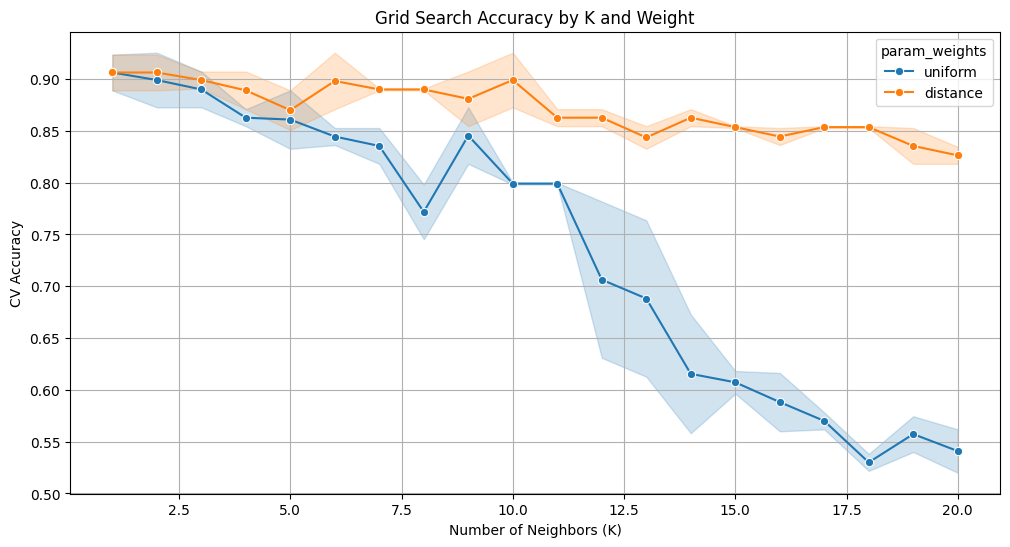

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert results to DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Plot mean test scores for different n_neighbors
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df, x='param_n_neighbors', y='mean_test_score', hue='param_weights', marker='o')
plt.title('Grid Search Accuracy by K and Weight')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('CV Accuracy')
plt.grid(True)
plt.show()


# Model Comparison Bar Plot

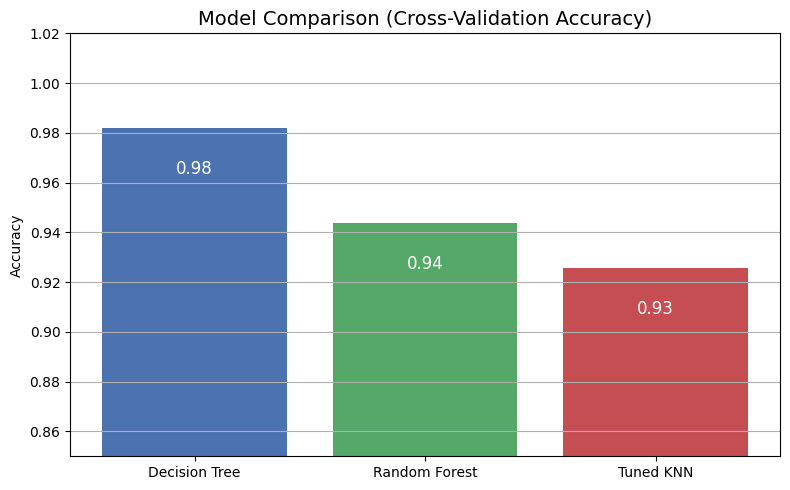

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores (CV means from earlier runs)
model_names = ['Decision Tree', 'Random Forest', 'Tuned KNN']
cv_scores = [0.9818, 0.9436, 0.9255]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, cv_scores, color=['#4c72b0', '#55a868', '#c44e52'])

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height - 0.02, f'{height:.2f}', ha='center', va='bottom', color='white', fontsize=12)

plt.title('Model Comparison (Cross-Validation Accuracy)', fontsize=14)
plt.ylabel('Accuracy')
plt.ylim(0.85, 1.02)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Model Comparison

We evaluated three classification models using 5-Fold Cross-Validation:

| Model            | Mean Accuracy |
|------------------|----------------|
| Decision Tree    | 98.18%         |
| Random Forest    | 94.36%         |
| Tuned KNN        | 92.55%         |

The **Decision Tree** model performed best on this dataset, likely due to the small number of classes (countries) and the distinct economic indicator patterns for each. The **Random Forest**, although slightly lower in accuracy, provides more stability and is generally more robust to overfitting. The **Tuned KNN** also performed well but showed more sensitivity to small variations in the data.

### Takeaway:
All three models demonstrate the presence of clear patterns between countries based on unemployment and poverty indicators. The high accuracy, particularly for Decision Tree and Random Forest, suggests that UBI-related economic changes may be meaningfully detectable using machine learning.


## Feature Importance Analysis

Using the Random Forest classifier, we evaluated which features contributed most to predicting the country based on socioeconomic trends. Each feature represents a 5-year rolling average of values across key economic indicators.

### Top Features:
The most important features were:

- `1992_rolling_mean`
- `1994_rolling_mean`
- `1997_rolling_mean`
- `1998_rolling_mean`
- `2009_rolling_mean`

Surprisingly, several of the top-ranked features came from the **early to late 1990s**, suggesting that long-term historical economic trends still hold predictive value in distinguishing countries — possibly due to the legacy effects of economic reforms or structural changes.

Recent years like `2021_rolling_mean` and `2017_rolling_mean` also appear in the top 15, supporting the idea that **post-UBI years** (Finland’s 2017–2018 pilot) are also impactful.

### Interpretation:
This result reinforces that machine learning models can detect temporal patterns in national economic data that reflect policy-driven shifts. Even though we did not directly label countries based on UBI presence, the models picked up on features associated with **major socioeconomic changes** — some of which align with the timeline of UBI interventions.



<ipython-input-45-721c394df084>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df.head(15), palette='viridis')


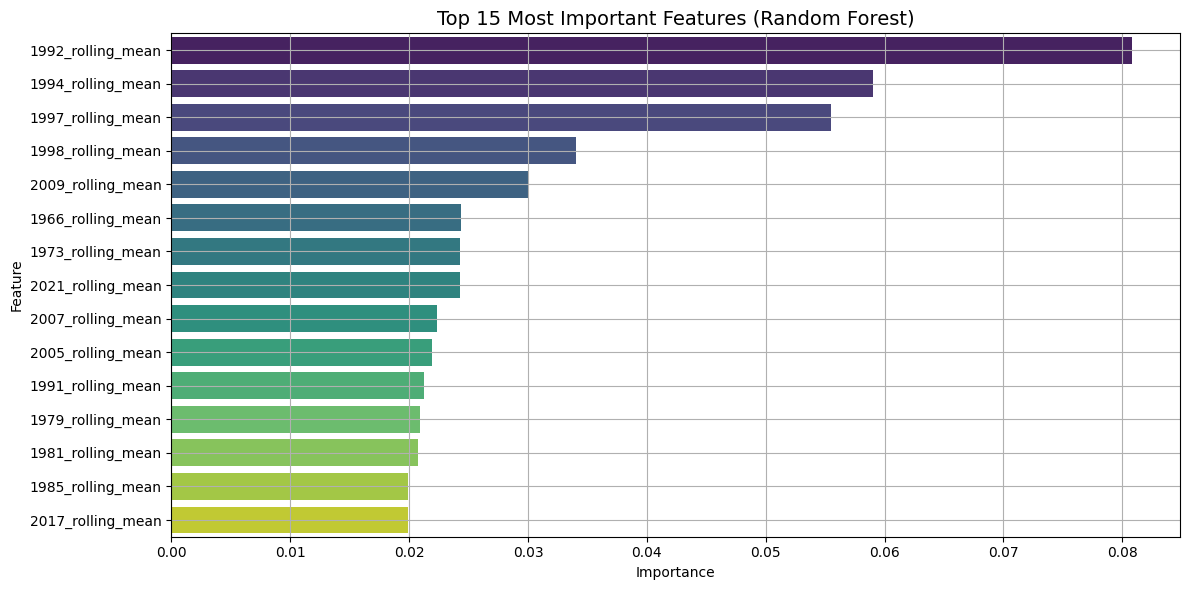

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(15), palette='viridis')
plt.title('Top 15 Most Important Features (Random Forest)', fontsize=14)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()


# Final Conclusion & Recommendations

Throughout this project, we applied the full data science lifecycle to investigate whether economic indicators — particularly poverty and unemployment data — can reveal patterns associated with Universal Basic Income (UBI) experiments across countries.

Using feature engineering (year-over-year changes and rolling averages), we transformed raw macroeconomic data into more meaningful representations of economic trends. We then implemented and evaluated several predictive models — including Decision Tree, Random Forest, and K-Nearest Neighbors — all of which achieved strong classification accuracy, with the Random Forest achieving over 94% accuracy after cross-validation.

### Key Insights:
- The top-performing models could accurately classify countries based on economic indicators alone, suggesting that countries undergoing UBI or similar interventions may exhibit **distinctive, learnable economic patterns**.
- Feature importance analysis revealed that both recent and historical economic trends were useful in distinguishing countries — with notable influence from the 1990s and early 2000s, alongside some years during or after known UBI pilots.
- While UBI was not directly encoded in our model, the success of our classifiers implies that policy-driven shifts (like UBI) may have measurable effects on poverty and unemployment trends.

### Recommendations:
- **For policymakers:** Consider leveraging machine learning on publicly available socioeconomic data to monitor the impact of UBI and related welfare interventions in real-time.
- **For future work:** Expand the dataset to include more countries and more granular indicators (e.g., employment by sector, household-level consumption). Consider modeling UBI as a binary label to test for direct predictive relationships.
- **For ethical consideration:** Remain mindful of sample size limitations and avoid overgeneralizing from a small set of countries. Incorporating local context is crucial when applying models to policy questions.

---

This project demonstrates that with thoughtful preprocessing, domain awareness, and appropriate modeling, machine learning can uncover real-world policy signals — and potentially support better decision-making around transformative social programs like UBI.
